***GOAL:*** A bank is investigating a very high rate of customer leaving the bank. Our goal is to analyze the given dataset and predict which of the customers are more likely to leave the bank in the near future.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")

#EDA and PREPROCESSING :

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(["RowNumber"], axis=1, inplace=True )

In [ ]:
df.drop(["CustomerId"], axis=1, inplace=True )

Irrelevent colums RowNumber and CustomerID are dropped.

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We can see that there are no null values in our dataset.

In [ ]:
#Seprating numeric and categoric columns:
df_num = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df_num.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_cat.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


**CHECKING MULTICOLINEARITY :**

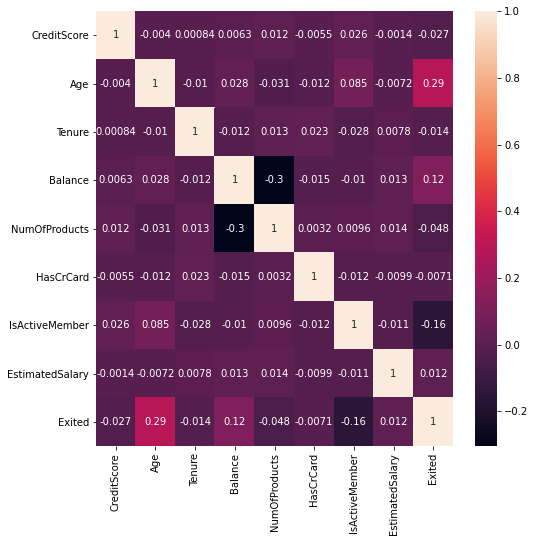

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see that there is no significant multicolinearity between the coulmns.



**UNIVARIATE ANALYSIS**

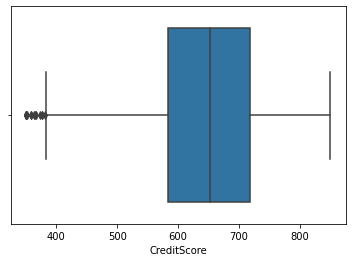

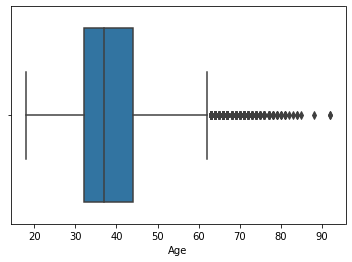

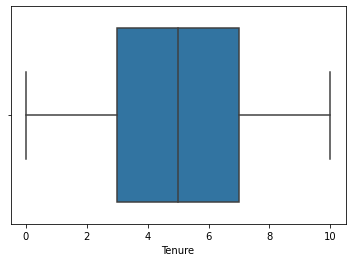

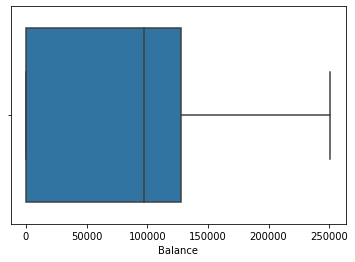

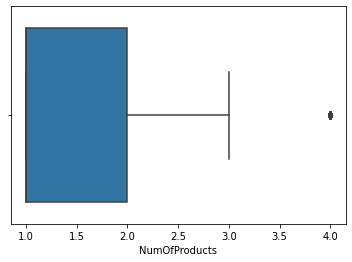

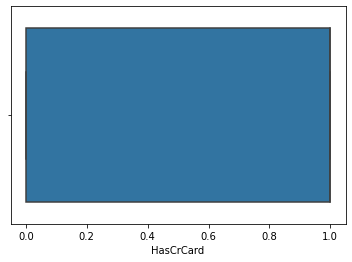

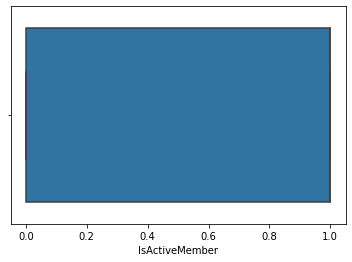

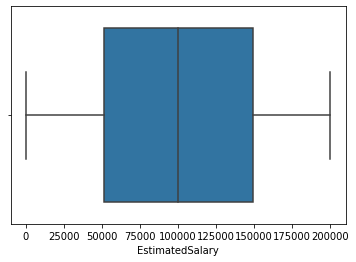

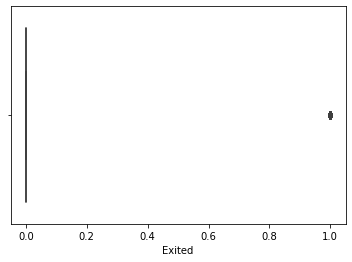

In [ ]:
for col in df_num:
    plt.figure()
    sns.boxplot(df_num[col])
    plt.show()

There are outliers in CreditScore, Age and NumofProduct colums.

CreditScore - -0.07159586676212397


<Figure size 432x288 with 0 Axes>

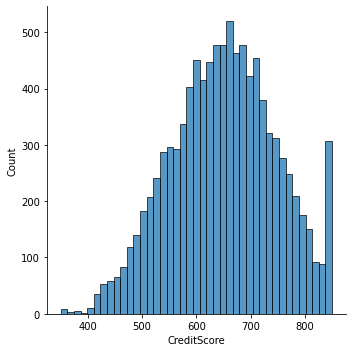

Age - 1.0111685586628079


<Figure size 432x288 with 0 Axes>

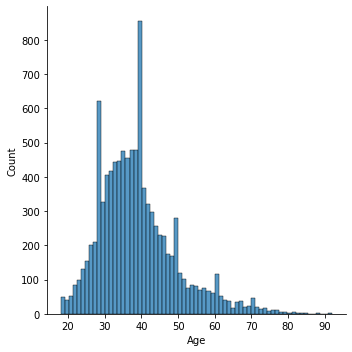

Tenure - 0.010989809189781041


<Figure size 432x288 with 0 Axes>

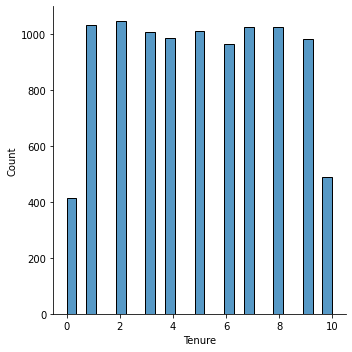

Balance - -0.14108754375291138


<Figure size 432x288 with 0 Axes>

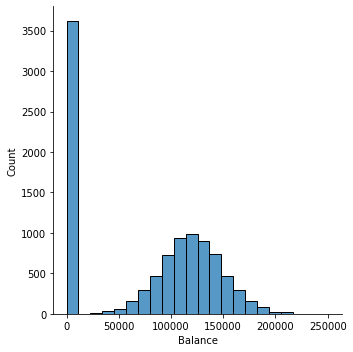

NumOfProducts - 0.745456048438949


<Figure size 432x288 with 0 Axes>

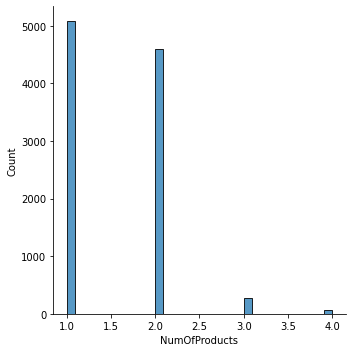

HasCrCard - -0.9016763178640548


<Figure size 432x288 with 0 Axes>

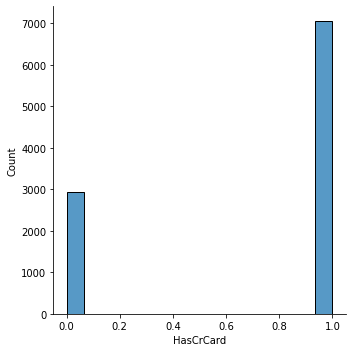

IsActiveMember - -0.06042756246298516


<Figure size 432x288 with 0 Axes>

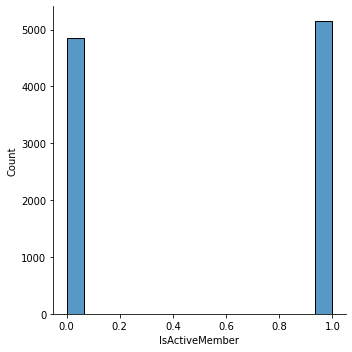

EstimatedSalary - 0.0020850448448748848


<Figure size 432x288 with 0 Axes>

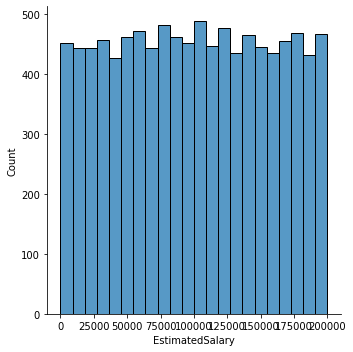

Exited - 1.4713899141398699


<Figure size 432x288 with 0 Axes>

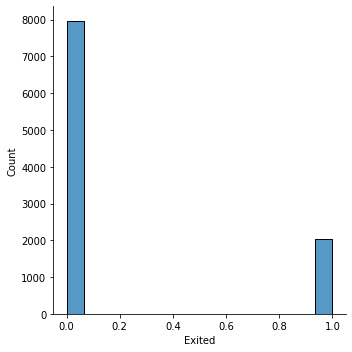

In [ ]:
for col in df_num:
    print(col,"-", skew(df_num[col]))
    plt.figure()
    sns.displot(df_num[col])
    plt.show()

**BIVARIATE ANALYSIS :**

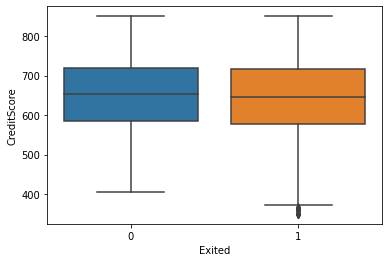

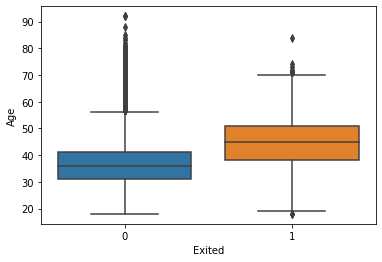

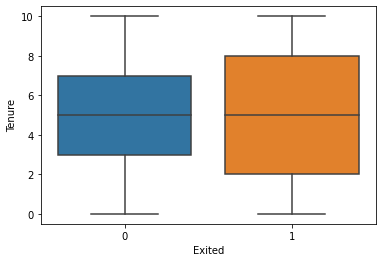

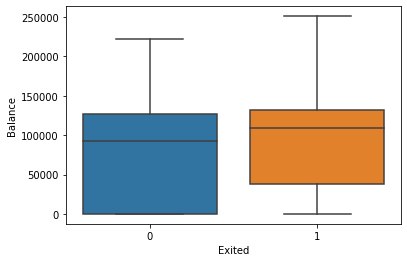

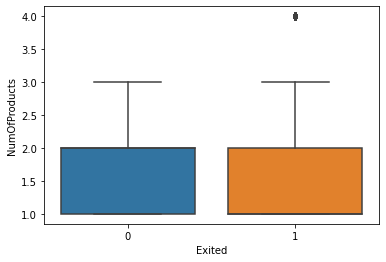

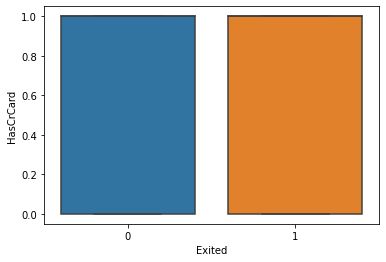

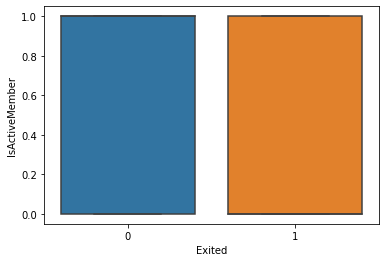

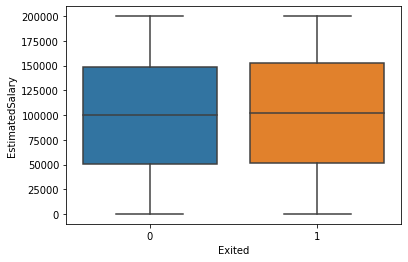

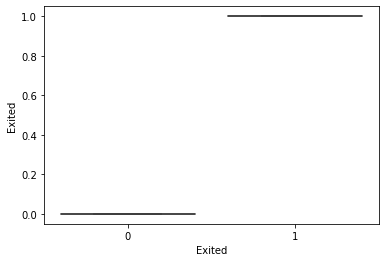

In [ ]:
for col in df_num:
 plt.figure()
 sns.boxplot(x='Exited',y = df_num[col],data=df_num)
 plt.show()

From the boxplots we can conclude that:

1> There is no significant difference in the credit score distribution between retained and churned customers.

2> Cutomers mostly between the age group of 35 to 50 are churning and those between 30 to 40 age group are not. The bank may need to review their target market or review the strategy for retention between the different age groups.

3> Customers having shorter tenure period have stayed with the bank while those having a lager tenure period have Exited.

4> The bank is losing customers with significant bank balances.

5> NumOfProducts,	HasCrCard,	IsActiveMember and 	EstimatedSalary	do not have any significant relation with Customer churn.


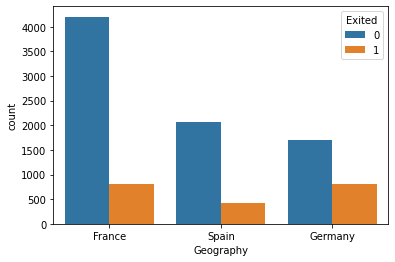

In [ ]:
plt.figure()
sns.countplot('Geography', hue = 'Exited', data = df)
plt.show()

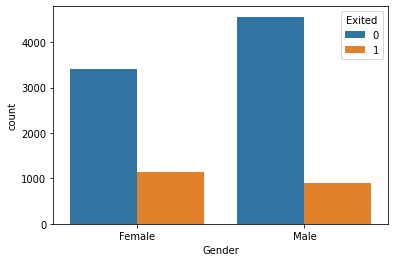

In [ ]:
plt.figure()
sns.countplot('Gender', hue = 'Exited', data = df)
plt.show()

From the count plots we can conclude that :

1> Of the three countries, Germany has the highest Churning rate where as France has the highest number of customer who stayed.

2>The number of female customers churning is greater than that of male.

**CHECKING COLUMNS FOR IMBALENCED DATA :**

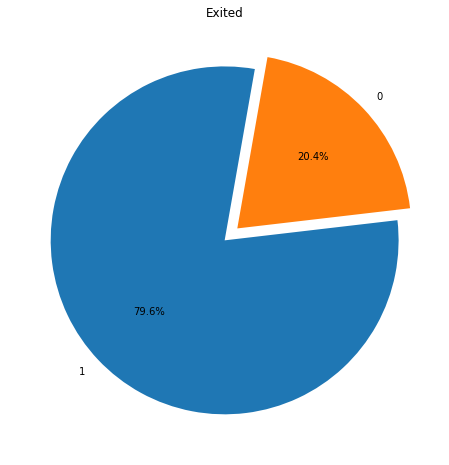

In [ ]:
explode = (0, 0.1)
plt.figure(figsize=(8,8))
plt.pie(df_num['Exited'].value_counts(),labels=df_num['Exited'].unique(), explode = explode, autopct="%.1f%%", startangle= 80)
plt.title(col)
plt.show()

We can see that there is imbalenced data in Exited column with almost 80 percent of customers churning and only 20 percent retained.

#Lable Encoding :

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [ ]:
#Concatenating the numeric and categoric columns
df_new = pd.concat([df_num,df_cat], axis=1)

In [ ]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname,Geography,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,1115,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1177,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,2040,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,289,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1822,2,0


In [ ]:
df_new.shape

(10000, 12)

In [ ]:
y = df_new[["Exited"]]
X = df_new.drop(["Exited"],axis=1)

In [ ]:
for col in X:
    if skew(X[col] >0.5) or skew(X[col] <-0.5):
     X[col]= np.sqrt(X[col])

In [ ]:
#Splitting training and testint data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#BASELINE MODEL :

In [ ]:
base_model = Sequential()
base_model.add(Dense(16,input_shape=(X.shape[1],),activation = 'relu'))
base_model.add(Dense(8,activation='relu'))
base_model.add(Dense(4,activation='relu'))
base_model.add(Dense(1,activation='sigmoid'))

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
base_model_history = base_model.fit(X_train_ss, y_train, epochs = 25, batch_size = 50)

Epoch 1/25
140/140 [==============================] - 1s 1ms/step - loss: 0.6152
Epoch 2/25
140/140 [==============================] - 0s 998us/step - loss: 0.4783
Epoch 3/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 4/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4384
Epoch 5/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4157
Epoch 6/25
140/140 [==============================] - 0s 998us/step - loss: 0.4184
Epoch 7/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4132
Epoch 8/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3923
Epoch 9/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4045
Epoch 10/25
140/140 [==============================] - 0s 1000us/step - loss: 0.3841
Epoch 11/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3909
Epoch 12/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3812
Epoch 13/25
140/14

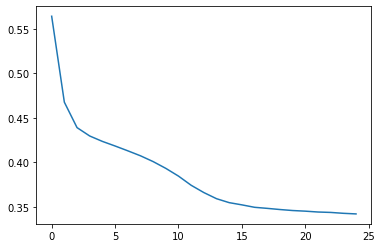

In [ ]:
plt.plot(base_model_history.history["loss"])

In [ ]:
y_pred_base = base_model.predict(X_test_ss)

In [ ]:
y_pred_base = np.where(y_pred_base>0.5,1,0)

In [ ]:
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2373
           1       0.80      0.42      0.55       627

    accuracy                           0.86      3000
   macro avg       0.83      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



**Our main aim is to predict the customers that will possibly churn so that the bank can retain them. So if a customer who is going to chun, is wrongly predicted by the model as not going to churn, the bank wont make strategy to retain that customer and will lose him. Hence the False negative i.e. recall measures on the 1's is of more importance to us than the overall accuracy score of the model. For the base line model as we can see the value of recall is very low.**

#Handeling imbalenced data

#Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample_1 ,y_sample_1 = ros.fit_resample(X_train_ss,y_train)

In [ ]:
pd.Series(y_sample_1).value_counts()

1    5590
0    5590
dtype: int64

#Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=1)

In [ ]:
X_sample_2, y_sample_2 = rus.fit_resample(X_train_ss, y_train)

In [ ]:
pd.Series(y_sample_2).value_counts()

#**ANN WITH OVERSAMPLING:**

In [ ]:
model = Sequential()
model.add(Dense(16,input_shape=(X.shape[1],), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_sample_1,y_sample_1,epochs=25,batch_size=50)

Epoch 1/25
224/224 [==============================] - 1s 1ms/step - loss: 0.6746
Epoch 2/25
224/224 [==============================] - 0s 1ms/step - loss: 0.5835
Epoch 3/25
224/224 [==============================] - 0s 1ms/step - loss: 0.5522
Epoch 4/25
224/224 [==============================] - 0s 1ms/step - loss: 0.5422
Epoch 5/25
224/224 [==============================] - 0s 1ms/step - loss: 0.5241
Epoch 6/25
224/224 [==============================] - 0s 1ms/step - loss: 0.5102
Epoch 7/25
224/224 [==============================] - 0s 1ms/step - loss: 0.5085
Epoch 8/25
224/224 [==============================] - 0s 1ms/step - loss: 0.5070
Epoch 9/25
224/224 [==============================] - 0s 1ms/step - loss: 0.4949
Epoch 10/25
224/224 [==============================] - 0s 1ms/step - loss: 0.4874
Epoch 11/25
224/224 [==============================] - 0s 1ms/step - loss: 0.4751
Epoch 12/25
224/224 [==============================] - 0s 1ms/step - loss: 0.4802
Epoch 13/25
224/224 [====

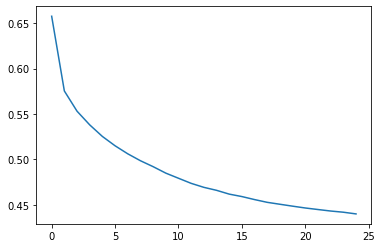

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
y_pred = model.predict(X_sample_1)

In [ ]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [ ]:
print(classification_report(y_sample_1,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      5590
           1       0.79      0.81      0.80      5590

    accuracy                           0.80     11180
   macro avg       0.80      0.80      0.80     11180
weighted avg       0.80      0.80      0.80     11180



**As we can see that the values of Precision, Recall and F1score have highly increased from that of the baseline model. Also Modelling with Oversamplling has given us a good recall of 81% which is the paramount for our Goal.**

#**ANN WITH UNDERSAMPLING :**

In [ ]:
model = Sequential()
model.add(Dense(16,input_shape=(X.shape[1],), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [ ]:
history = model.fit(X_sample_2,y_sample_2,epochs=25,batch_size=50)

Epoch 1/25
57/57 [==============================] - 0s 1ms/step - loss: 0.6979
Epoch 2/25
57/57 [==============================] - 0s 1ms/step - loss: 0.6663
Epoch 3/25
57/57 [==============================] - 0s 1ms/step - loss: 0.6308
Epoch 4/25
57/57 [==============================] - 0s 1ms/step - loss: 0.6084
Epoch 5/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5924
Epoch 6/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5657
Epoch 7/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5575
Epoch 8/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5373
Epoch 9/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5191
Epoch 10/25
57/57 [==============================] - 0s 2ms/step - loss: 0.5299
Epoch 11/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5238
Epoch 12/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5077
Epoch 13/25
57/57 [==============================

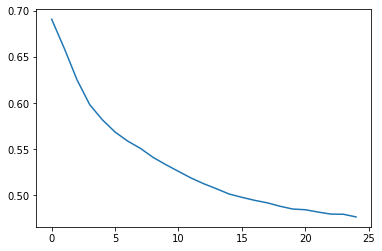

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
y_pred = model.predict(X_sample_2)

In [ ]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [ ]:
print(classification_report(y_sample_2,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1410
           1       0.76      0.80      0.78      1410

    accuracy                           0.78      2820
   macro avg       0.78      0.78      0.78      2820
weighted avg       0.78      0.78      0.78      2820



**As we can see Modelling with Undersamplling is giving us better precision, recall and f1score than the Base model but, not as good as Modelling with Oversamplling.**

#***CONCLUSION***: 
**From the review of the fitted models above, the best model that gives a good trade off of the recall and precision is ANN WITH OVERSAMPLING, where we are getting a precision on 1's of 79 percent, recall of 81 percent, f1-score of 80 percent and accuracy of 80 percent. Out of all customers that the model thinks will churn, 81 percent do actually churn.** 
